In [1]:
print("""
# GA-Optimized Decision Trees: Quick Start Guide

This notebook demonstrates how to use the GA-optimized decision tree framework.
We'll train a model on the Iris dataset and visualize the results.
""")



# GA-Optimized Decision Trees: Quick Start Guide

This notebook demonstrates how to use the GA-optimized decision tree framework.
We'll train a model on the Iris dataset and visualize the results.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [4]:
import sys
sys.path.insert(0, '../src')

from ga_trees.ga.engine import GAEngine, GAConfig, TreeInitializer, Mutation
from ga_trees.fitness.calculator import FitnessCalculator, TreePredictor
from ga_trees.genotype.tree_genotype import TreeGenotype
print("✓ Imports complete")

✓ Imports complete


In [5]:
print("\n## Loading Iris Dataset\n")

X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names
target_names = load_iris().target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


## Loading Iris Dataset

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Train size: 105, Test size: 45


In [6]:
print("\n## Setting up Genetic Algorithm\n")

n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))
feature_ranges = {i: (X_train[:, i].min(), X_train[:, i].max()) 
                 for i in range(n_features)}

ga_config = GAConfig(
    population_size=50,
    n_generations=30,
    crossover_prob=0.7,
    mutation_prob=0.2,
    tournament_size=3,
    elitism_ratio=0.1
)

initializer = TreeInitializer(
    n_features=n_features,
    n_classes=n_classes,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2
)

fitness_calc = FitnessCalculator(
    mode='weighted_sum',
    accuracy_weight=0.7,
    interpretability_weight=0.3
)

mutation = Mutation(n_features=n_features, feature_ranges=feature_ranges)

print("✓ Configuration complete")
print(f"  Population: {ga_config.population_size}")
print(f"  Generations: {ga_config.n_generations}")
print(f"  Max depth: {initializer.max_depth}")


## Setting up Genetic Algorithm

✓ Configuration complete
  Population: 50
  Generations: 30
  Max depth: 4


In [7]:
print("\n## Training GA-Optimized Tree\n")

ga_engine = GAEngine(
    config=ga_config,
    initializer=initializer,
    fitness_function=fitness_calc.calculate_fitness,
    mutation=mutation
)

best_tree = ga_engine.evolve(X_train, y_train, verbose=True)

print("\n✓ Training complete!")


## Training GA-Optimized Tree

Gen 0: Best=0.8854, Avg=0.6123
Gen 10: Best=0.9166, Avg=0.8914
Gen 20: Best=0.9232, Avg=0.9049

✓ Training complete!


In [8]:
print("\n## Evaluation Results\n")

predictor = TreePredictor()
y_train_pred = predictor.predict(best_tree, X_train)
y_test_pred = predictor.predict(best_tree, X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"\nTree Statistics:")
print(f"  Depth: {best_tree.get_depth()}")
print(f"  Nodes: {best_tree.get_num_nodes()}")
print(f"  Leaves: {best_tree.get_num_leaves()}")
print(f"  Features Used: {best_tree.get_num_features_used()}/{n_features}")
print(f"  Balance: {best_tree.get_tree_balance():.4f}")
print(f"  Interpretability: {best_tree.interpretability_:.4f}")


## Evaluation Results

Train Accuracy: 0.9619
Test Accuracy:  0.9111

Tree Statistics:
  Depth: 3
  Nodes: 15
  Leaves: 8
  Features Used: 1/4
  Balance: 1.0000
  Interpretability: 0.8479



## Visualizing Evolution

✓ Plots saved to results/quick_start_results.png


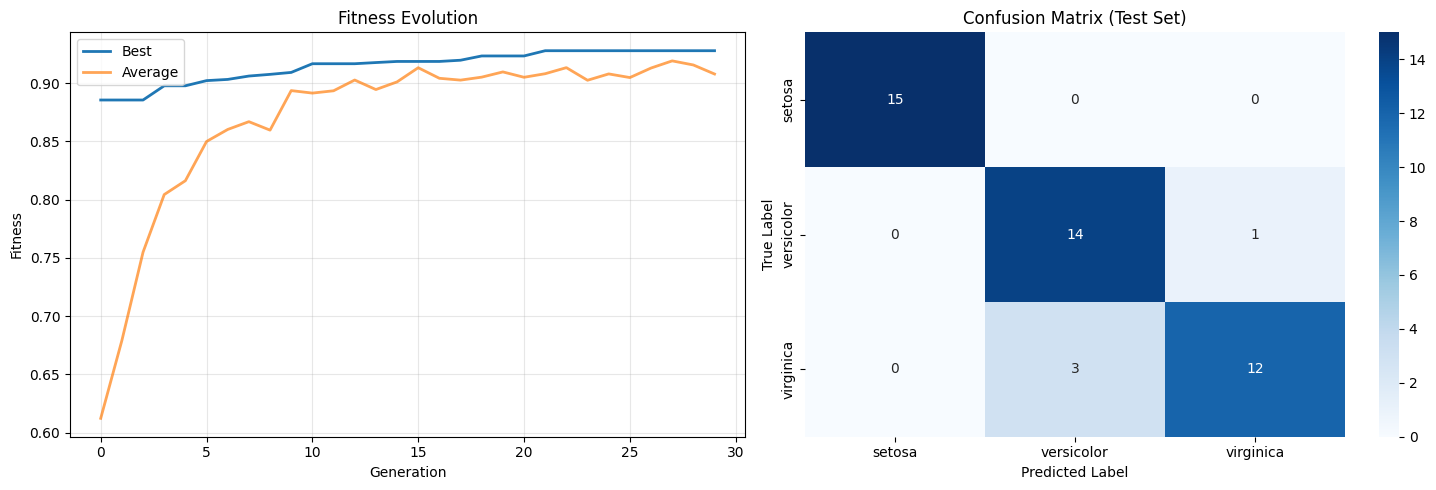

In [10]:
print("\n## Visualizing Evolution\n")

history = ga_engine.get_history()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Fitness over time
ax1.plot(history['best_fitness'], label='Best', linewidth=2)
ax1.plot(history['avg_fitness'], label='Average', linewidth=2, alpha=0.7)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness')
ax1.set_title('Fitness Evolution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=target_names, yticklabels=target_names)
ax2.set_title('Confusion Matrix (Test Set)')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

plt.tight_layout()
#plt.savefig('results/quick_start_results.png', dpi=300, bbox_inches='tight') // can be save to your directory by uncommenting this
print("✓ Plots saved to results/quick_start_results.png")


In [11]:
print("\n## Decision Rules\n")

rules = best_tree.to_rules()
print(f"Extracted {len(rules)} rules:\n")
for i, rule in enumerate(rules, 1):
    # Make rules more readable with feature names
    readable_rule = rule
    for j, name in enumerate(feature_names):
        readable_rule = readable_rule.replace(f"X[{j}]", name)
    print(f"{i}. {readable_rule}")

print("\n" + "="*60)
print("Quick start complete! 🎉")
print("="*60)


## Decision Rules

Extracted 8 rules:

1. IF petal length (cm) <= 4.9830 AND petal length (cm) <= 2.7801 AND petal length (cm) <= 4.7321 THEN class=0
2. IF petal length (cm) <= 4.9830 AND petal length (cm) <= 2.7801 AND petal length (cm) > 4.7321 THEN class=0
3. IF petal length (cm) <= 4.9830 AND petal length (cm) > 2.7801 AND petal length (cm) <= 5.4520 THEN class=1
4. IF petal length (cm) <= 4.9830 AND petal length (cm) > 2.7801 AND petal length (cm) > 5.4520 THEN class=0
5. IF petal length (cm) > 4.9830 AND petal length (cm) <= 4.7321 AND petal length (cm) <= 4.7321 THEN class=0
6. IF petal length (cm) > 4.9830 AND petal length (cm) <= 4.7321 AND petal length (cm) > 4.7321 THEN class=0
7. IF petal length (cm) > 4.9830 AND petal length (cm) > 4.7321 AND petal length (cm) <= 4.7321 THEN class=0
8. IF petal length (cm) > 4.9830 AND petal length (cm) > 4.7321 AND petal length (cm) > 4.7321 THEN class=2

Quick start complete! 🎉
